# COMP0120 Project - Support Vector Machines (SVMs)
## John Duffy, Student Number: 19154676
## Project Code


In [66]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

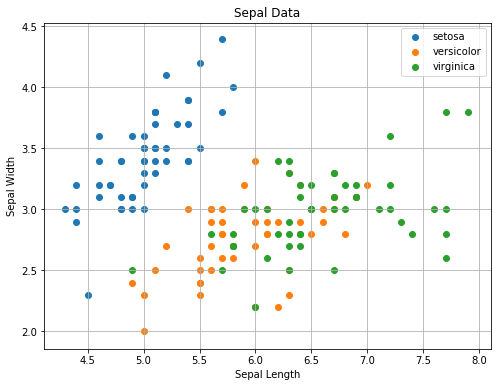

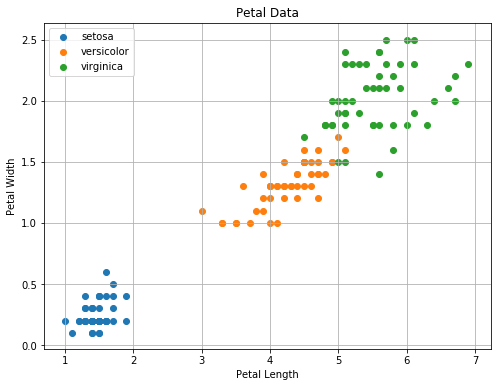

In [67]:
iris = datasets.load_iris()

X = iris["data"]
y = iris["target"]
y_names = iris["target_names"]

# Sepal Data
plt.figure(figsize=(8, 6))
for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=y_names[i])
plt.title("Sepal Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.grid()
plt.savefig("iris_sepal.png")
plt.show()

# Petal Data
plt.figure(figsize=(8, 6))
for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=y_names[i])
plt.title("Petal Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()
plt.savefig("iris_petal.png")
plt.show()